In [48]:
# THIS ANALYZING IS FOCUSING ON THE FARE DATA 

In [49]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as plt
%matplotlib inline

In [50]:
# reading data from csv file
full_data = pd.read_csv('titanic-data.csv')

In [51]:
# split data into 2 groups: SURVIVED and NON-SURVIVED groups
full_data_survived = full_data[full_data['Survived'] == 1]
full_data_non_survived = full_data[full_data['Survived'] == 0]

## 1. Displaying the statistic values and box plot.

In [52]:
# What i'm going to do here is:

# 1. Spliting full data into 2 groups: Survived and Non-survived, just focusing on the Fare data only.

# 2. Displaying the statistic values of each data group.

# 3. Display the box and whisker plot for both data groups.

In [53]:
################################### START 1 ###################################

In [54]:
# excluding records which has Fare = 0
# just need data of columns: Fare, Survived

fare_data_survived = full_data_survived[full_data_survived['Fare'] > 0][['Fare','Survived']]
fare_data_non_survived = full_data_non_survived[full_data_non_survived['Fare'] > 0][['Fare','Survived']]

In [55]:
################################### END 1 ###################################

In [56]:
################################### START 2 ###################################

In [57]:
fare_data_survived['Fare'].describe()

count    341.000000
mean      48.537330
std       66.643049
min        6.975000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [58]:
fare_data_non_survived['Fare'].describe()

count    535.000000
mean      22.696673
std       31.589367
min        4.012500
25%        7.895800
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [59]:
################################### END 2 ###################################

In [60]:
################################### START 3 ###################################

In [61]:
# concat 2 above Series into one DataFrame
df_fare = pd.concat([fare_data_survived, fare_data_non_survived])

In [62]:
df_fare.head()

,Fare,Survived
1,71.2833,1
2,7.9250,1
3,53.1000,1
8,11.1333,1
9,30.0708,1


In [63]:
# function to convert the survived digit to text
# if survived digit = 1 --> text is 'Survived'
# alse text is 'Non-survived'
def survival_digit_to_text(digit):
    if digit == 1:
        return 'Survived'
    else:
        return 'Non-survived'

In [64]:
# apply function survival_digit_to_text for column 'Survived'
# the text returned will be stored in new column 'Survival state'
df_fare['Survival state'] = df_fare['Survived'].apply(survival_digit_to_text)
del df_fare['Survived']

In [65]:
df_fare.head()

,Fare,Survival state
1,71.2833,Survived
2,7.9250,Survived
3,53.1000,Survived
8,11.1333,Survived
9,30.0708,Survived


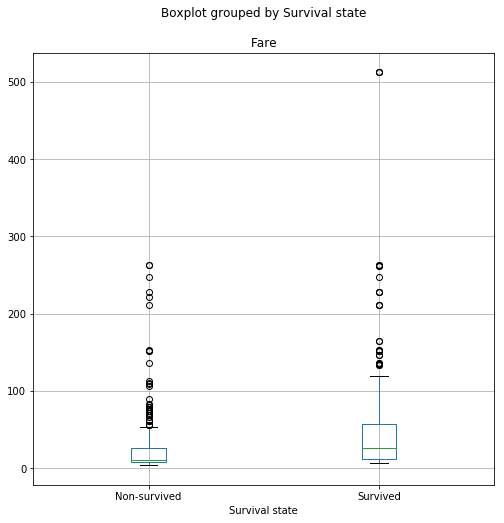

In [66]:
# display the Fare data in the box and whisker plot for each group
df_fare.boxplot(column = 'Fare', by='Survival state', figsize=(8, 8))

In [67]:
# we can see that the box of SURVIVED group is above the NON-SURVIVED,
# all the statistic values of the SURVIVED group is also greater than the NON-SURVIVED.
# that means SURVIVED passengers spent more money for fare than the NON-SURIRVED.

In [68]:
################################### END 3 ###################################

## 2. Did survived passengers spend more money for Fare than the Non-survived?

In [69]:
# I will answer this question by performing the hypothesis testing to ensure 

# my hypothesis is: the SURVIVED group spent more money for fare than the NON-SURVIVED.

# Ho: miu(s) <= miu(n)
# Ha: miu(s) > miu(n)

# with:
    # miu(s) is the mean value of Fare of SURVIVED group
    # miu(n) is the mean value of Fare of NON-SURVIVED group.

In [70]:
# I assume that:
    # - this testing data is random sample from the population.
    # - the population data is normally distributed.
    # - these 2 groups are independent.
    
# so now I will apply the T-TEST for INDEPENDENT MEANS to prove the hypothesis.

In [71]:
# this function will calculate the mean, standard deviation and size of input data
# then calculate the standard error (se)
# finally return the t-statistic value

# input parameter: values of 2 groups
# output returned: the t-statistic value

import math
def t_statistic_of_independent_means(data1, data2):
    try:
        mean1, std1, size1 = data1.mean(), data1.std(), len(data1)
        mean2, std2, size2 = data2.mean(), data2.std(), len(data2)
        
        se = math.sqrt( (std1*std1)/size1 + (std2*std2)/size2 )
        df = size1 + size2 - 2
        return round((mean2-mean1)/se, 2), df
    except:
        raise ValueError

In [72]:
# calculating t_statistic value and degree of freedom by
# passing the Fare data of 2 groups into function t_statistic_of_independent_means
t_statistic, df = t_statistic_of_independent_means(fare_data_non_survived['Fare'], fare_data_survived['Fare'])

In [73]:
# print out the t_statistic and degree of freedom values
print(t_statistic, df)

6.7 874


In [74]:
# at alpha level = 0.001 (one tailed test), df = 874
# refer to the t-table, we will have t-critical:
t_critical = 3.0996

In [75]:
#### CONCLUSION ####
# since the t_critical = 3.0996 < t_statistic = 6.7
# so we REJECT THE NULL at alpha level = 0.001, mean we are 99.9% confident to claim that:
# the SURVIVED passengers spent significantly more money for the fare than the NON-SURVIVED.